In [46]:
import pandas as pd

In [47]:
df = pd.read_csv("SuperMarket.csv")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          10194 non-null  int64  
 1   Order ID        10194 non-null  object 
 2   Order Date      10194 non-null  object 
 3   Ship Date       10194 non-null  object 
 4   Ship Mode       10194 non-null  object 
 5   Customer ID     10194 non-null  object 
 6   Customer Name   10194 non-null  object 
 7   Segment         10194 non-null  object 
 8   Country/Region  10194 non-null  object 
 9   City            10194 non-null  object 
 10  State/Province  10194 non-null  object 
 11  Postal Code     10194 non-null  object 
 12  Region          10194 non-null  object 
 13  Product ID      10194 non-null  object 
 14  Category        10194 non-null  object 
 15  Sub-Category    10194 non-null  object 
 16  Product Name    10194 non-null  object 
 17  Sales           10194 non-null 

In [49]:
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64


In [50]:
segment_counts = df['Segment'].value_counts()
print(segment_counts)

Segment
Consumer       5281
Corporate      3090
Home Office    1823
Name: count, dtype: int64


In [51]:
country_counts = df['Country/Region'].value_counts()
print(country_counts)

Country/Region
United States    9994
Canada            200
Name: count, dtype: int64


In [52]:
city_counts = df['City'].value_counts() 
print(city_counts)

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Manhattan          1
Iowa City          1
Cedar Rapids       1
Baytown            1
Danbury            1
Name: count, Length: 542, dtype: int64


In [53]:
Danbury_order = df[df['City'] == 'Danbury'].to_string(index=False)
print(Danbury_order)

 Row ID       Order ID Order Date  Ship Date      Ship Mode Customer ID Customer Name     Segment Country/Region    City State/Province Postal Code Region      Product ID  Category Sub-Category            Product Name  Sales  Quantity  Discount  Profit
  10094 US-2024-110625 23-12-2024 30-12-2024 Standard Class    JB-16045 Julia Barnett Home Office  United States Danbury    Connecticut       06810   East FUR-FU-10001473 Furniture  Furnishings DAX Wood Document Frame  27.46         2       0.0  9.8856


In [54]:
postal_code_count = df['Postal Code'].value_counts()
print(postal_code_count)

Postal Code
10035    263
10024    230
10009    229
94122    203
10011    193
        ... 
68701      1
93454      1
60477      1
52402      1
98208      1
Name: count, Length: 654, dtype: int64


In [55]:
postal = df[df['Postal Code']== '10035']
print(postal)

       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
139       140  US-2021-143707  01-03-2021  05-03-2021  Standard Class   
148       149  US-2021-127964  03-03-2021  08-03-2021  Standard Class   
149       150  US-2021-127964  03-03-2021  08-03-2021  Standard Class   
152       153  US-2021-127964  03-03-2021  08-03-2021  Standard Class   
317       318  US-2021-113887  05-04-2021  07-04-2021     First Class   
...       ...             ...         ...         ...             ...   
9955     9956  US-2024-100230  11-12-2024  15-12-2024  Standard Class   
9960     9961  US-2024-100230  11-12-2024  15-12-2024  Standard Class   
10123   10124  US-2024-161480  25-12-2024  29-12-2024  Standard Class   
10125   10126  US-2024-146780  25-12-2024  30-12-2024  Standard Class   
10180   10181  US-2024-102638  29-12-2024  31-12-2024     First Class   

      Customer ID   Customer Name      Segment Country/Region           City  \
139      HR-14770  Hallie Redmond  Home Off

In [56]:
print(df['Category'].value_counts())

Category
Office Supplies    6128
Furniture          2201
Technology         1865
Name: count, dtype: int64


In [57]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')  # Specify the format
df['Day'] = df['Order Date'].dt.day
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# print(df['Day'].head())
# print(df['Month'].head())
# print(df['Year'].head())

In [58]:
print(df[df['Sales']  > 600])

       Row ID        Order ID Order Date   Ship Date       Ship Mode  \
5           6  US-2021-167199 2021-01-06  10-01-2021  Standard Class   
8           9  US-2021-167199 2021-01-06  10-01-2021  Standard Class   
12         13  US-2021-167199 2021-01-06  10-01-2021  Standard Class   
30         31  US-2021-157147 2021-01-13  18-01-2021  Standard Class   
31         32  US-2021-162775 2021-01-13  15-01-2021    Second Class   
...       ...             ...        ...         ...             ...   
10121   10122  US-2024-145219 2024-12-24  25-12-2024     First Class   
10137   10138  US-2024-114055 2024-12-25  29-12-2024    Second Class   
10149   10150  US-2024-121741 2024-12-26  26-12-2024        Same Day   
10169   10170  US-2024-163979 2024-12-28  02-01-2025    Second Class   
10172   10173  US-2024-158526 2024-12-29  01-01-2025    Second Class   

      Customer ID     Customer Name      Segment Country/Region  \
5        ME-17320     Maria Etezadi  Home Office  United States   
8

In [59]:
print(df['Sales'].max())

22638.48


Descriptive Analysis

In [60]:
# Total and average sales by region, category, and segment
region_sales = df.groupby('Region')['Sales'].agg(['sum', 'mean']).reset_index()
category_sales = df.groupby('Category')['Sales'].agg(['sum', 'mean']).reset_index()
segment_sales = df.groupby('Segment')['Sales'].agg(['sum', 'mean']).reset_index()

# Convert Order Date to datetime for trend analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by month and calculate total sales and profit
trend_data = df.resample('M', on='Order Date').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

region_sales, category_sales, segment_sales, trend_data.head()

C:\Users\1\AppData\Local\Temp\ipykernel_16988\1791249016.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend_data = df.resample('M', on='Order Date').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()


(    Region          sum        mean
 0  Central  503170.6728  215.490652
 1     East  691828.1680  231.690612
 2    South  391721.9050  241.803645
 3     West  739813.6085  227.425026,
           Category          sum        mean
 0        Furniture  754747.7613  342.911295
 1  Office Supplies  731893.3140  119.434288
 2       Technology  839893.2790  450.344922,
        Segment           sum        mean
 0     Consumer  1.170660e+06  221.673885
 1    Corporate  7.158061e+05  231.652471
 2  Home Office  4.400684e+05  241.397933,
   Order Date      Sales     Profit
 0 2021-01-31  14518.055  2539.3907
 1 2021-02-28   4519.892   862.3084
 2 2021-03-31  56933.909   693.4499
 3 2021-04-30  28295.345  3488.8352
 4 2021-05-31  26319.767  3196.3918)

Customer Segmentation: Use clustering (e.g., K-Means) to group customers based on purchase behavior.

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare the data for clustering: Group by Customer ID and calculate aggregated metrics
customer_data = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Sales', 'Profit', 'Quantity']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Show resulting clusters and the first few rows
customer_clusters = customer_data.groupby('Cluster').agg({
    'Sales': ['mean', 'sum'],
    'Profit': ['mean', 'sum'],
    'Quantity': ['mean', 'sum']
}).reset_index()

customer_data, customer_clusters

(    Customer ID     Sales     Profit  Quantity  Cluster
 0      AA-10315  5563.560  -362.8825        30        0
 1      AA-10375  1056.390   277.3824        41        0
 2      AA-10480  1790.512   435.8274        36        0
 3      AA-10645  5086.935   857.8033        64        1
 4      AB-10015   886.156   129.3465        13        0
 ..          ...       ...        ...       ...      ...
 799    XP-21865  2503.156   675.9584       121        1
 800    YC-21895  5454.350  1305.6290        31        1
 801    YS-21880  6720.444  1778.2923        58        2
 802    ZC-21910  8025.707 -1032.1490       105        1
 803    ZD-21925  1493.944   249.1307        32        0
 
 [804 rows x 5 columns],
   Cluster        Sales                     Profit                Quantity  \
                   mean           sum         mean          sum       mean   
 0       0  1494.577775  6.964732e+05    82.100551   38258.8568  31.495708   
 1       1  3852.995406  1.082692e+06   454.146732  127

In [62]:
cus_10315 = df[df['Customer ID'] == 'AA-10315']
# print(cus_10315.head())
cus_10315['Sales'].sum()

5563.5599999999995

In [63]:
df['Sales'].sum()

2326534.3543

C:\Users\1\AppData\Local\Temp\ipykernel_16988\2418855899.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=13, freq='M')[1:], forecast, label="Forecasted Sales", color='red')


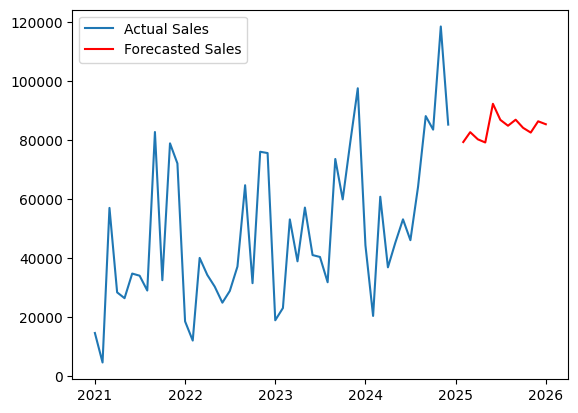

In [64]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Group by month and aggregate sales data
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by month and aggregate sales data (ensure proper datetime index)
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Convert PeriodIndex to datetime for proper handling by ARIMA or Prophet
monthly_sales.index = monthly_sales.index.to_timestamp()

# Fit ARIMA model (p, d, q values can be adjusted)
model = ARIMA(monthly_sales, order=(5, 1, 0))  # p, d, q can be tuned
model_fit = model.fit()

# Make predictions for the next 12 months
forecast = model_fit.forecast(steps=12)

plt.plot(monthly_sales.index, monthly_sales.values, label="Actual Sales")
plt.plot(pd.date_range(monthly_sales.index[-1], periods=13, freq='M')[1:], forecast, label="Forecasted Sales", color='red')
plt.legend()
plt.show()

Profitability Analysis : Identify the most/least profitable products, customers, and regions.

In [65]:
# Most and Least Profitable Products

# Calculate total profit for each product
product_profit = df.groupby('Product Name').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Sort by profit to find the most and least profitable products
product_profit_sorted = product_profit.sort_values(by='Profit', ascending=False)

# Display the top and bottom products
most_profitable_product = product_profit_sorted.head(10)
least_profitable_product = product_profit_sorted.tail(10)

print("Most Profitable Products:")
print(most_profitable_product)
print("\nLeast Profitable Products:")
print(least_profitable_product)


Most Profitable Products:
                                           Product Name      Sales      Profit
404               Canon imageCLASS 2200 Advanced Copier  61599.824  25199.9280
649   Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384   7753.0390
804                Hewlett Packard LaserJet 3310 Copier  18839.686   6983.8836
400                  Canon PC1060 Personal Laser Copier  11619.834   4570.9347
786   HP Designjet T520 Inkjet Large Format Printer ...  18374.895   4094.9766
165                   Ativa V4110MDD Micro-Cut Shredder   7699.890   3772.9461
19     3D Systems Cube Printer, 2nd Generation, Magenta  14299.890   3717.9714
1275  Plantronics Savi W720 Multi-Device Wireless He...   9367.290   3696.2820
894                Ibico EPK-21 Electric Binding System  15875.916   3345.2823
1839                  Zebra ZM400 Thermal Label Printer   6965.700   3343.5360

Least Profitable Products:
                                           Product Name      Sales     Profit

In [66]:
df[df['Product Name'] == 'Canon imageCLASS 2200 Advanced Copier']['Sales'].sum()

61599.824

In [67]:
# Most and Least Profitable Customers

# Calculate total profit for each customer
customer_profit = df.groupby('Customer ID').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Sort by profit to find the most and least profitable customers
customer_profit_sorted = customer_profit.sort_values(by='Profit', ascending=False)

# Display the top and bottom customers
most_profitable_customer = customer_profit_sorted.head(10)
least_profitable_customer = customer_profit_sorted.tail(10)

print("Most Profitable Customers:")
print(most_profitable_customer)
print("\nLeast Profitable Customers:")
print(least_profitable_customer)

Most Profitable Customers:
    Customer ID      Sales     Profit
752    TC-20980  19052.218  8981.3239
632    RB-19360  15117.339  6976.0959
680    SC-20095  14142.334  5757.4119
328    HL-15040  12873.298  5622.4292
6      AB-10105  14473.571  5444.8055
741    TA-21385  14595.620  4703.7883
161    CM-12385   8954.020  3899.8904
433    KD-16495   8181.256  3038.6254
48     AR-10540   6608.448  2884.6208
235    DR-12940   8350.868  2869.0760

Least Profitable Customers:
    Customer ID      Sales     Profit
571    NF-18385   8322.826 -1695.9714
166    CP-12340   5888.275 -1850.3029
711    SM-20320  25043.050 -1980.7393
677    SB-20290   8057.891 -2082.7451
565    NC-18415   2218.990 -2204.8072
323    HG-14965   3247.642 -2797.9635
722    SR-20425   3233.481 -3333.9144
468    LF-17185   3930.509 -3583.9770
311    GT-14635   9351.212 -4108.6589
181    CS-12505   5690.055 -6626.3895


In [68]:
customer_data = df[df['Customer ID'] == 'TC-20980']
print(f"Sales sum = {customer_data['Sales'].sum()}, Profit sum = {customer_data['Profit'].sum()}")


Sales sum = 19052.218000000004, Profit sum = 8981.3239


In [69]:
# Most and Least Profitable Regions

# Calculate total profit for each region
region_profit = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Sort by profit to find the most and least profitable regions
region_profit_sorted = region_profit.sort_values(by='Profit', ascending=False)

# Display the top and bottom regions
most_profitable_region = region_profit_sorted.head(10)
least_profitable_region = region_profit_sorted.tail(10)

print("Most Profitable Regions:")
print(most_profitable_region)
print("\nLeast Profitable Regions:")
print(least_profitable_region)


Most Profitable Regions:
    Region        Sales       Profit
3     West  739813.6085  110798.8170
1     East  691828.1680   94883.2603
2    South  391721.9050   46749.4303
0  Central  503170.6728   39865.3070

Least Profitable Regions:
    Region        Sales       Profit
3     West  739813.6085  110798.8170
1     East  691828.1680   94883.2603
2    South  391721.9050   46749.4303
0  Central  503170.6728   39865.3070


In [70]:
print("Sales = " , df[df['Region'] == 'West']['Sales'].sum())
print("Profit = " , df[df['Region'] == 'West']['Profit'].sum())

Sales =  739813.6085
Profit =  110798.817


Discount Optimization: Assess the impact of discounts on sales and profit to suggest optimal discount strategies.

In [71]:
# If not, you can calculate it as: (List Price - Sale Price) / List Price
df['Discount Percentage'] = df['Discount'] * 100  # Assuming 'Discount' is a proportion (e.g., 0.1 for 10%)

# Create discount ranges
df['Discount Range'] = pd.cut(df['Discount Percentage'], bins=[0, 5, 10, 15, 20, 25, 30, 100], 
                              labels=["0-5%", "5-10%", "10-15%", "15-20%", "20-25%", "25-30%", "30%+"])

# Calculate average sales and profit for each discount range
discount_analysis = df.groupby('Discount Range').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()

print(discount_analysis)


  Discount Range       Sales      Profit
0           0-5%         NaN         NaN
1          5-10%  572.421844   94.791354
2         10-15%  529.971567   27.288298
3         15-20%  208.834160   24.576350
4         20-25%         NaN         NaN
5         25-30%  454.235074  -45.710633
6           30%+  219.650703 -105.913283


C:\Users\1\AppData\Local\Temp\ipykernel_16988\404709940.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = df.groupby('Discount Range').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()


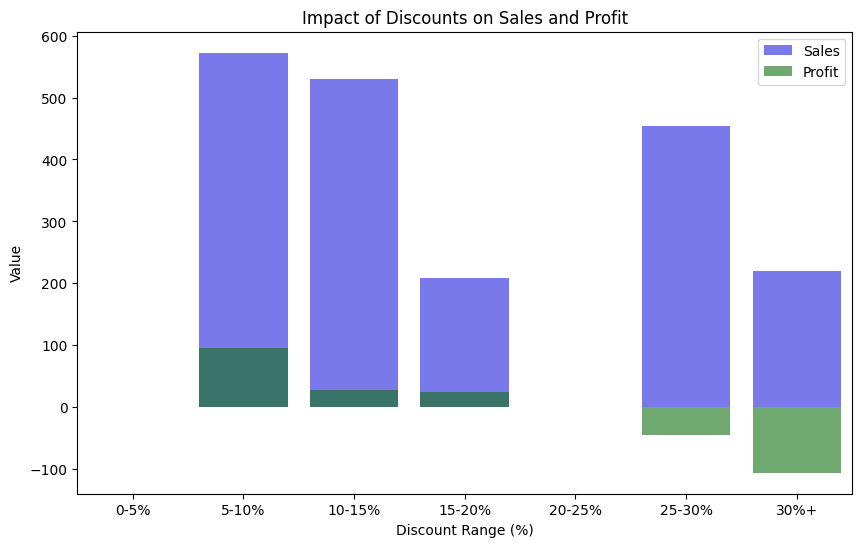

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Plot the relationship between discount and average sales/profit
plt.figure(figsize=(10, 6))

# Plot average sales and profit by discount range
sns.barplot(x='Discount Range', y='Sales', data=discount_analysis, color='blue', alpha=0.6, label='Sales')
sns.barplot(x='Discount Range', y='Profit', data=discount_analysis, color='green', alpha=0.6, label='Profit')

plt.title("Impact of Discounts on Sales and Profit")
plt.xlabel("Discount Range (%)")
plt.ylabel("Value")
plt.legend()
plt.show()


In [73]:
# Calculate correlation between Discount, Sales, and Profit
correlation_matrix = df[['Discount Percentage', 'Sales', 'Profit']].corr()

# Display the correlation matrix
print(correlation_matrix)


                     Discount Percentage     Sales    Profit
Discount Percentage             1.000000 -0.027756 -0.218882
Sales                          -0.027756  1.000000  0.481460
Profit                         -0.218882  0.481460  1.000000


Geographical Heatmaps: Visualize sales and profit distribution geographically.

In [74]:
# Group by geographic region
geographical_data = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

print(geographical_data)


    Region        Sales       Profit
0  Central  503170.6728   39865.3070
1     East  691828.1680   94883.2603
2    South  391721.9050   46749.4303
3     West  739813.6085  110798.8170


Anomaly Detection: Detect unusual trends in sales, profit, or discount using outlier detection techniques.

In [75]:
# Select relevant columns for anomaly detection
anomaly_data = df[['Sales', 'Profit', 'Discount']]

# Check for missing values and handle them if any
print(anomaly_data.isnull().sum())


Sales       0
Profit      0
Discount    0
dtype: int64


In [76]:
from scipy.stats import zscore

# Calculate Z-scores for each column
z_scores = anomaly_data.apply(zscore)

# Define a threshold for anomalies (e.g., Z > 3 or Z < -3)
threshold = 3
anomalies = (z_scores.abs() > threshold)

# Flag and display rows with anomalies
anomalous_rows = df[anomalies.any(axis=1)]
print(anomalous_rows)


       Row ID        Order ID Order Date   Ship Date       Ship Mode  \
1           2  US-2021-112326 2021-01-04  08-01-2021  Standard Class   
5           6  US-2021-167199 2021-01-06  10-01-2021  Standard Class   
15         16  US-2021-105417 2021-01-07  12-01-2021  Standard Class   
93         94  US-2021-108182 2021-02-06  10-02-2021    Second Class   
115       116  US-2021-122567 2021-02-16  21-02-2021  Standard Class   
...       ...             ...        ...         ...             ...   
10121   10122  US-2024-145219 2024-12-24  25-12-2024     First Class   
10130   10131  US-2024-134194 2024-12-25  01-01-2025  Standard Class   
10131   10132  US-2024-134194 2024-12-25  01-01-2025  Standard Class   
10134   10135  US-2024-134194 2024-12-25  01-01-2025  Standard Class   
10162   10163  US-2024-163860 2024-12-28  01-01-2025  Standard Class   

      Customer ID      Customer Name      Segment Country/Region         City  \
1        PO-19195      Phillina Ober  Home Office  Uni

In [77]:
from sklearn.ensemble import IsolationForest

# Train an Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(anomaly_data)

# Identify anomalies (label -1 as anomalies)
anomalies = df[df['Anomaly_Score'] == -1]
print(anomalies)



       Row ID        Order ID Order Date   Ship Date       Ship Mode  \
5           6  US-2021-167199 2021-01-06  10-01-2021  Standard Class   
39         40  US-2021-146591 2021-01-19  20-01-2021     First Class   
144       145  US-2021-127978 2021-03-03  08-03-2021  Standard Class   
146       147  US-2021-130421 2021-03-03  07-03-2021  Standard Class   
198       199  US-2021-148838 2021-03-17  21-03-2021  Standard Class   
...       ...             ...        ...         ...             ...   
10068   10069  US-2024-150910 2024-12-22  28-12-2024  Standard Class   
10095   10096  US-2024-121216 2024-12-23  25-12-2024    Second Class   
10121   10122  US-2024-145219 2024-12-24  25-12-2024     First Class   
10131   10132  US-2024-134194 2024-12-25  01-01-2025  Standard Class   
10134   10135  US-2024-134194 2024-12-25  01-01-2025  Standard Class   

      Customer ID   Customer Name      Segment Country/Region  \
5        ME-17320   Maria Etezadi  Home Office  United States   
39   

In [78]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN on the data
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(anomaly_data)

# Add labels to the dataframe
df['Cluster'] = labels

# Identify outliers (label -1 as anomalies)
outliers = df[df['Cluster'] == -1]
print(outliers)


       Row ID        Order ID Order Date   Ship Date       Ship Mode  \
3           4  US-2021-112326 2021-01-04  08-01-2021  Standard Class   
5           6  US-2021-167199 2021-01-06  10-01-2021  Standard Class   
8           9  US-2021-167199 2021-01-06  10-01-2021  Standard Class   
9          10  US-2021-167199 2021-01-06  10-01-2021  Standard Class   
12         13  US-2021-167199 2021-01-06  10-01-2021  Standard Class   
...       ...             ...        ...         ...             ...   
10175   10176  US-2024-146626 2024-12-29  05-01-2025  Standard Class   
10181   10182  US-2024-158673 2024-12-29  04-01-2025  Standard Class   
10186   10187  US-2024-143259 2024-12-30  03-01-2025  Standard Class   
10187   10188  US-2024-126221 2024-12-30  05-01-2025  Standard Class   
10192   10193  US-2024-143259 2024-12-30  03-01-2025  Standard Class   

      Customer ID      Customer Name      Segment Country/Region  \
3        PO-19195      Phillina Ober  Home Office  United States   

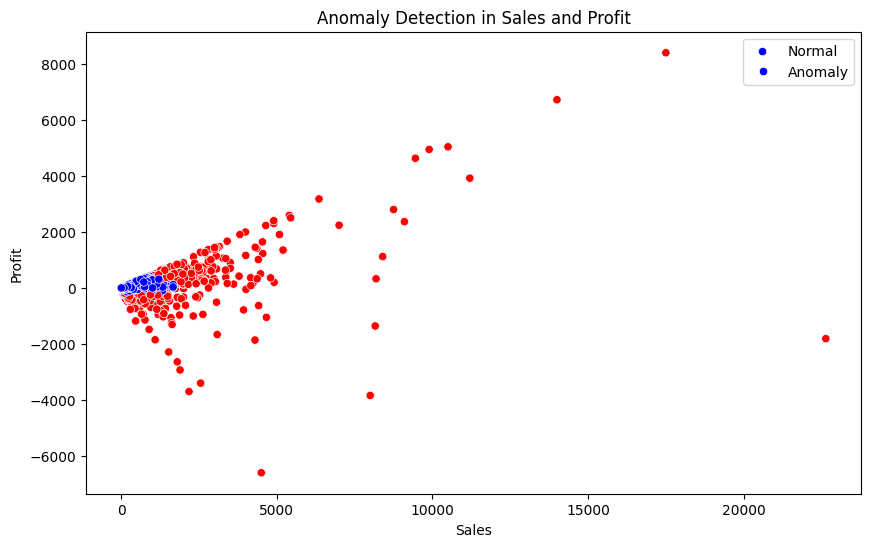

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue=(df['Anomaly_Score'] == -1), palette=['blue', 'red'])
plt.title('Anomaly Detection in Sales and Profit')
plt.legend(['Normal', 'Anomaly'])
plt.show()



Shipping Efficiency: Analyze shipping times and modes to optimize delivery schedules.

In [80]:
# Convert Order Date and Ship Date to datetime format with dayfirst=True
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')

# Check for any NaT (missing dates due to parsing issues)
print(df[['Order Date', 'Ship Date']].isna().sum())

# Calculate Delivery Time in days
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Verify the result
print(df[['Order Date', 'Ship Date', 'Delivery Time']].head())


Order Date    0
Ship Date     0
dtype: int64
  Order Date  Ship Date  Delivery Time
0 2021-01-03 2021-01-07              4
1 2021-01-04 2021-01-08              4
2 2021-01-04 2021-01-08              4
3 2021-01-04 2021-01-08              4
4 2021-01-05 2021-01-12              7


In [81]:
# Group by Shipping Mode and calculate delivery statistics
shipping_stats = df.groupby('Ship Mode').agg({
    'Delivery Time': ['mean', 'median', 'max', 'std']
}).reset_index()

print(shipping_stats)


        Ship Mode Delivery Time                     
                           mean median max       std
0     First Class      2.182171    2.0   4  0.771431
1        Same Day      0.043876    0.0   1  0.205006
2    Second Class      3.237494    3.0   5  1.191556
3  Standard Class      4.996405    5.0  11  1.019977


C:\Users\1\AppData\Local\Temp\ipykernel_16988\1121812029.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Ship Mode', y='Delivery Time', palette='Set2')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


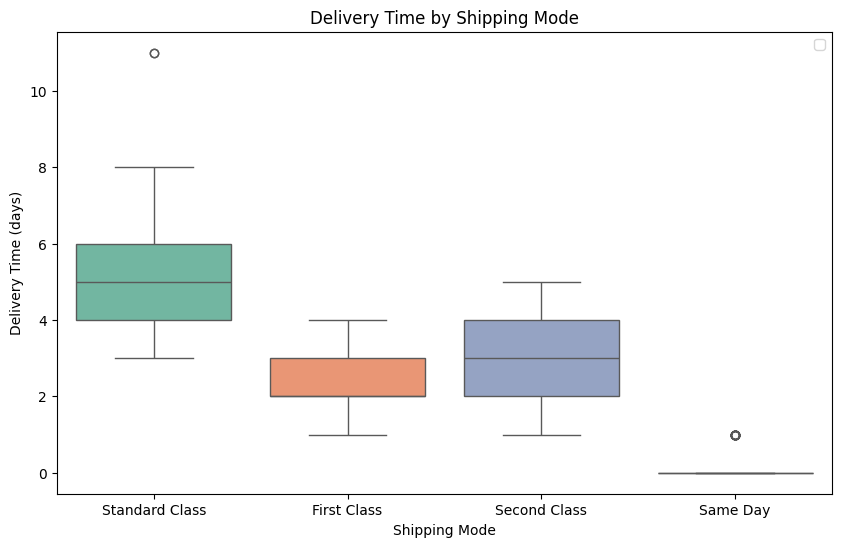

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of Delivery Time by Shipping Mode
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Ship Mode', y='Delivery Time', palette='Set2')
plt.title('Delivery Time by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Delivery Time (days)')
plt.legend()
plt.show()


In [83]:
# Calculate thresholds for delays (e.g., > mean + 2*std)
thresholds = shipping_stats['Delivery Time']['mean'] + 2 * shipping_stats['Delivery Time']['std']
threshold_dict = dict(zip(shipping_stats['Ship Mode'], thresholds))

# Flag delayed shipments
df['Delayed'] = df.apply(
    lambda row: row['Delivery Time'] > threshold_dict[row['Ship Mode']],
    axis=1
)

# Analyze delayed shipments
delayed_orders = df[df['Delayed']]
print(delayed_orders[['Ship Mode', 'Delivery Time']].head())


           Ship Mode  Delivery Time
129      First Class              4
1356        Same Day              1
1357        Same Day              1
1698  Standard Class             11
1699  Standard Class             11
